In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
import random
random.seed(123)

# Sources:
# one feature lin regression: https://www.youtube.com/watch?v=p9CsSf_x-wk
# in a class: https://www.geeksforgeeks.org/linear-regression-implementation-from-scratch-using-python/
# a bit too complicated: https://www.youtube.com/watch?v=RIg3iuen7MY
# in a class: https://www.askpython.com/python/examples/linear-regression-from-scratch
# Nice solution, but wierd notation: https://github.com/nishant-sg/Machine-Learning-Algorithms/blob/main/Multiple%20Linear%20Regression/Multiple%20Linear%20Regression%20from%20Scratch.ipynb
# https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = pd.DataFrame(df[["rm", "age", "dis"]]) # feature
#X = pd.DataFrame(df[["rm"]]) 
y = pd.DataFrame(df["medv"]) # target

In [4]:
X.shape

(506, 3)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [6]:
print(X_train.shape)
print(y_train.shape)

(354, 3)
(354, 1)


----------
## Overview of Linear Regression

#### The basic model for multiple linear regression is (I'll call the coefficients weights and the intercept ${\beta}$)

$y_{i}=\beta _{0}+weight_{1} x_{i}+\cdots + weight_{n} x_{n} = \mathbf {X} _{i}^{\mathsf {T}}{\boldsymbol {\beta }} + \beta _{0},\qquad i=1,\ldots ,n$

----------

#### This that is needed for a linear regression algorithm:
- init weights: ${\beta}_{0}$ = 0, other weights = random

----------
#### In a loop of iterations:
- (forward) Prediction function
    - $\hat{y}$ = np.dot(X, weights) + ${\beta}_{0}$
    
    where np.dot stands for matrix multiplication function


- Gradient descent, ak. the way to calculate the new weights (it's the result of the chain derivate of the cost function) 
    - $dW = -\frac{2}{m}*np.dot(X_T, y-\hat{y})$
    - $d{\beta}_{0} = -\frac{2}{m}* \Sigma_{i=1}^{m}{(y_i-\hat{y_i})}$


- update weights 
    - $W = W - lr * dW$
    - ${\beta}_{0} = {\beta}_{0} - lr* d{\beta}_{0}$ 
    
    where $lr$ is the predefined `learning rate`


- loss (in this case MSE) / error / cost calculation
    - $\text{MSE} = \frac{1}{2m}\Sigma_{i=1}^{m}{\Big({y_i - \hat{y}_i}\Big)^2}$
    
    where $m$ is the number of samples -> put it in a list, for plotting it out
----------


In [7]:
def init_weights(X):
    """ Initializes the weights of the model
    """
    weights = [random.random() for _ in range(X.shape[1])]
    weights = np.array(weights)
    b0 = 0

    print("weights initialized!")
    print(b0, weights)
    
    return b0, weights


In [8]:
def predict(sample, b0, weights):
    """ Predict function
    """
    prediction = round(np.dot(sample, weights) + b0, 3)
    
    return prediction

In [9]:
def linear_regression_model_fit(X, y, learning_rate, iteration):
    """ Linear regression fit function. Calculates weights based on X and y using Gradient descent
    """
    
    m, n = X.shape
    b0, weights = init_weights(X)
    cost_list = []
    
    for i in range(0, iteration):
        
        y_pred = np.dot(X, weights) + b0 # prediction
        #y_pred = np.dot(X, weights)
        
        mse = 1/(2*m) * np.sum(np.square(y - y_pred)) # cost function, OLS, Mean squared error

        d_weights = - 2/m * np.dot(X.T, y - y_pred) # Gradient Descent
        d_b0 = -2/m * np.sum(y - y_pred)
               
        weights = weights - learning_rate * d_weights # -> model coefficients
        b0 = b0 - learning_rate * d_b0 
        cost_list.append(mse)
        
        # Print error / cost every so often
        if i % 1000 == 0:
            print("Cost: -----------------> {}".format(np.mean(mse)))
        
    print("\nLinear Regression model trained.\n")
    
    return b0, weights, cost_list

In [10]:
iteration = 100000
learning_rate = 0.00005
b0, weights, cost_list = linear_regression_model_fit(X_train, y_train.values.flatten(), learning_rate = learning_rate, iteration = iteration)

print(b0, weights)

weights initialized!
0 [0.0523636  0.08718668 0.40724176]
Cost: -----------------> 166.15311695304786
Cost: -----------------> 38.5138861805582
Cost: -----------------> 33.98852776218473
Cost: -----------------> 31.838440232644956
Cost: -----------------> 30.14495789681317
Cost: -----------------> 28.76481778490595
Cost: -----------------> 27.63801398091479
Cost: -----------------> 26.71785440719772
Cost: -----------------> 25.966326506613058
Cost: -----------------> 25.35241332256501
Cost: -----------------> 24.85080324388484
Cost: -----------------> 24.440840434304285
Cost: -----------------> 24.105668452290644
Cost: -----------------> 23.83153139722896
Cost: -----------------> 23.60720360168965
Cost: -----------------> 23.423524225047693
Cost: -----------------> 23.273017453085508
Cost: -----------------> 23.149582557374224
Cost: -----------------> 23.048240964555298
Cost: -----------------> 22.964929849227914
Cost: -----------------> 22.896333692976455
Cost: -----------------> 22.8

In [11]:
X_test2 = X_test.values.tolist()


In [12]:
y_pred = []

for sample in X_test2:
    mod_pred = predict(sample, b0, weights)
    y_pred.append(mod_pred)
    
    print("Sample: {} -> prediction: {}".format(sample, mod_pred))

# y_pred

Sample: [6.416, 84.1, 2.6463] -> prediction: 22.537
Sample: [6.758, 32.9, 4.0776] -> prediction: 31.406
Sample: [5.983, 98.8, 1.8681] -> prediction: 18.299
Sample: [6.065, 7.8, 5.2873] -> prediction: 29.753
Sample: [6.297, 91.8, 2.3682] -> prediction: 20.849
Sample: [6.279, 74.5, 4.0522] -> prediction: 21.637
Sample: [5.914, 83.2, 3.9986] -> prediction: 17.98
Sample: [6.174, 93.6, 1.6119] -> prediction: 20.642
Sample: [6.229, 90.7, 3.0993] -> prediction: 19.767
Sample: [6.027, 79.7, 2.4982] -> prediction: 20.972
Sample: [5.951, 93.8, 2.8893] -> prediction: 17.749
Sample: [6.004, 85.9, 6.5921] -> prediction: 15.152
Sample: [4.519, 100.0, 1.6582] -> prediction: 9.119
Sample: [6.232, 53.7, 5.0141] -> prediction: 23.635
Sample: [5.708, 74.3, 4.7211] -> prediction: 17.309
Sample: [6.98, 67.6, 2.5329] -> prediction: 28.909
Sample: [5.879, 95.8, 2.0063] -> prediction: 17.976
Sample: [4.88, 100.0, 1.5895] -> prediction: 11.472
Sample: [7.875, 32.0, 5.6484] -> prediction: 36.801
Sample: [6.185,

In [13]:
y_test2 = y_test.values.tolist()
y_test2_flatten = [num[0] for num in y_test2]
# y_test2_flatten

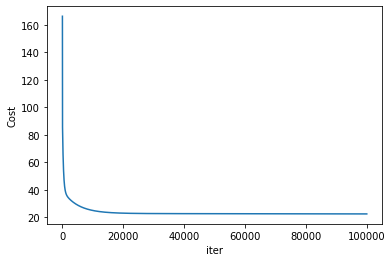

In [14]:
# Plot the cost function
plt.plot(np.arange(iteration), cost_list)
plt.xlabel("iter")
plt.ylabel("Cost")
plt.show()


In [15]:
# Compare it to sklearn

from sklearn.linear_model import LinearRegression

clf = LinearRegression(fit_intercept=True)
clf.fit(X_train, y_train)

print("Custom implementation intercept & coefs: ")
print(b0, weights)

print("\n")

print("sklearn intercept & coefs: ")
print(clf.intercept_, clf.coef_)

Custom implementation intercept & coefs: 
-1.1648286830792416 [ 6.30068808 -0.16299647 -1.13948156]


sklearn intercept & coefs: 
[-22.46897352] [[ 8.59574587 -0.09950527 -0.54254192]]


In [16]:
d = {"custom_weights": weights, "sklearn_weights": clf.coef_[0]}

df_weights = pd.DataFrame(d)
df_weights

,custom_weights,sklearn_weights
0,6.300688,8.595746
1,-0.162996,-0.099505
2,-1.139482,-0.542542


In [17]:
y_pred_sk = clf.predict(X_test).flatten()

In [18]:
#y_pred_sk

In [19]:
from sklearn import metrics
from scipy.stats import pearsonr

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r, p = pearsonr(y_test2_flatten, y_pred)

print("Custom implementation RMSE & Pearson coeff:")
print("RMSE: {}".format(rmse))
print("Pearson: {}".format(r))


rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_sk))
r, p = pearsonr(y_test2_flatten, y_pred_sk)

print("\nsklearn implementation RMSE & Pearson coeff:")
print("RMSE: {}".format(rmse))
print("Pearson: {}".format(r))

Custom implementation RMSE & Pearson coeff:
RMSE: 6.136913959586562
Pearson: 0.7116048533982424

sklearn implementation RMSE & Pearson coeff:
RMSE: 5.921424190324507
Pearson: 0.7302123709247088
